In [ ]:
# ChatGPT urls:
# url 1: https://chatgpt.com/share/67400b48-3f0c-8001-af1b-4beab2045a2c
# url 2:

# Question 1

A classification decision tree is used to classify very large sets of data into smaller manageable subsets, by repeatedly dividing the data, further and further, decided by binary conditions. An example of how a classification decision tree can be used is for 

# Question 2
Accuracy - most accurate when predicting false negatives and false positives are equally as costly. An example of this is in product quality control in manufacturing, when overall high accuracy is most preferred.

Sensitivity - measures the proportion of actual positives that are correctly identified, most accurate for true positives. An example is for Medical Diagnosis for Serious Diseases (like cancer or other serious ailment). Need to very accurately seperate false from true negatives so that true positives are actually identified.

Specificity - best for measuring the  proportion of  negatives that are correctly identified. An example is when Spam Email Filtering, specificity is needed to match whether things are spam or not as accurately as possible, for email security. It reduces the over amount of emails that could incorretly be marked as spam. 

Precision - measures proportion of positive identifications that is correct. An example of this is Fraud Detection in Financial Transactions, identifiying scams correctly in this case is the most important thing, so ensuring this is correct is very important for the financial company in question. 


summary of interaction 1:

1. **Accuracy**: Useful in balanced scenarios where both false positives and false negatives are equally costly, such as in **quality control in manufacturing**.
2. **Sensitivity (Recall)**: Crucial when missing positives (false negatives) has severe consequences, such as in **medical diagnosis** (e.g., cancer detection).
3. **Specificity**: Important when false positives are more costly, such as in **spam email filtering**, where it's vital to avoid classifying legitimate emails as spam.
4. **Precision**: Vital when you want to ensure that positive identifications are correct, like in **fraud detection**, where false positives can lead to customer dissatisfaction or operational costs.

Each metric was matched with a real-world application, along with a brief explanation of why it's relevant for that scenario.

# Question 3

In [4]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Check the column names and first few rows to debug
print("Column names in the dataset:")
print(ab.columns)

print("\nFirst few rows of the dataset:")
print(ab.head())

# Now that we can inspect the actual column names, we can proceed with cleaning

# Remove 'Weight_oz', 'Width', and 'Height' columns if they exist
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=[col for col in columns_to_remove if col in ab.columns])

# Check for NaN values in each column before dropping rows
print("\nMissing values in each column before dropping rows:")
print(ab_reduced.isna().sum())

# Drop rows with NaN values
ab_reduced_noNaN = ab_reduced.dropna()

# Now, based on the correct column names, update these transformations
# Assuming the correct column names are 'Year' (instead of 'Pub Year') and 'NumPages'
# Adjust column names if they differ
if 'Year' in ab_reduced_noNaN.columns:
    ab_reduced_noNaN['Year'] = ab_reduced_noNaN['Year'].astype(int)
if 'NumPages' in ab_reduced_noNaN.columns:
    ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
if 'Hard_or_Paper' in ab_reduced_noNaN.columns:
    ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Check the cleaned dataset info
print("\nCleaned DataFrame info:")
ab_reduced_noNaN.info()

print("\nFirst few rows of the cleaned dataset:")
print(ab_reduced_noNaN.head())


Column names in the dataset:
Index(['Title', 'Author', 'List Price', 'Amazon Price', 'Hard_or_Paper',
       'NumPages', 'Publisher', 'Pub year', 'ISBN-10', 'Height', 'Width',
       'Thick', 'Weight_oz'],
      dtype='object')

First few rows of the dataset:
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P     304.0         Adams Media   
1       15.00         10.20             P     273.0          Free Press   
2        1.50          1.50             P      96.0  Dover Publications   
3

/tmp/ipykernel_52/843105008.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
/tmp/ipykernel_52/843105008.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')


# Question 4

In [5]:
# Method 1: Using df.sample()
# Set the seed for reproducibility
train_size = 0.8
ab_reduced_noNaN_train = ab_reduced_noNaN.sample(frac=train_size, random_state=42)
ab_reduced_noNaN_test = ab_reduced_noNaN.drop(ab_reduced_noNaN_train.index)

# Report the number of observations
print(f"Number of observations in the training set: {len(ab_reduced_noNaN_train)}")
print(f"Number of observations in the test set: {len(ab_reduced_noNaN_test)}")


Number of observations in the training set: 255
Number of observations in the test set: 64


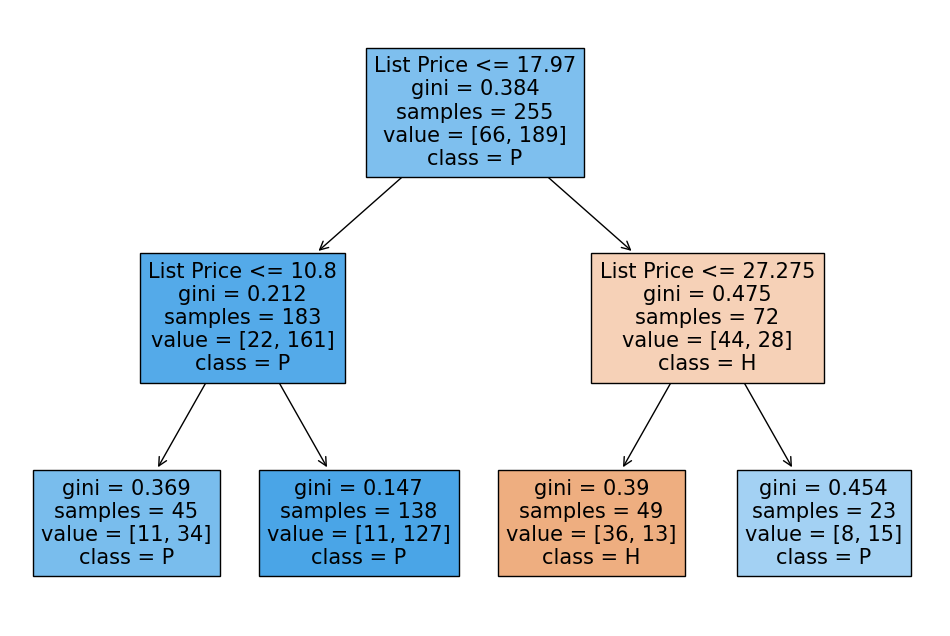

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset (assuming the dataset 'ab_reduced_noNaN' is ready)
# Using the ab_reduced_noNaN DataFrame

# Select the feature (List Price) and the target variable (Hard_or_Paper)
X = ab_reduced_noNaN[['List Price']]  # Feature: List Price
y = ab_reduced_noNaN['Hard_or_Paper']  # Target: Hardcover or Paperback

# Split the data into training and testing sets (optional, but helps generalization)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier with a max_depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier (fit the model)
clf.fit(X_train, y_train)

# Plot the decision tree to visualize the model
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, feature_names=['List Price'], class_names=clf.classes_, filled=True)
plt.show()


In this case, the tree.plot_tree only predicts the book have a chance be hardcover if the list price is greater than equal to 27.275.

# Question 6

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming the ab_reduced_noNaN_train and ab_reduced_noNaN_test datasets are ready
# Feature and target variables for both training and test datasets
X_train = ab_reduced_noNaN_train[['List Price']]  # Feature: List Price
y_train = ab_reduced_noNaN_train['Hard_or_Paper']  # Target: Hardcover or Paperback

X_test = ab_reduced_noNaN_test[['List Price']]  # Feature: List Price
y_test = ab_reduced_noNaN_test['Hard_or_Paper']  # Target: Hardcover or Paperback

# Train the first model (clf) with a max_depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Train the second model (clf2) with a max_depth of 3 (or another hyperparameter for diversity)
clf2 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf2.fit(X_train, y_train)

# Make predictions on the test set for both models
y_pred_clf = clf.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)

# Create confusion matrices for both models
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Calculate sensitivity, specificity, and accuracy for clf
TP_clf = cm_clf[1, 1]
TN_clf = cm_clf[0, 0]
FP_clf = cm_clf[0, 1]
FN_clf = cm_clf[1, 0]

sensitivity_clf = TP_clf / (TP_clf + FN_clf)
specificity_clf = TN_clf / (TN_clf + FP_clf)
accuracy_clf = accuracy_score(y_test, y_pred_clf)

# Calculate sensitivity, specificity, and accuracy for clf2
TP_clf2 = cm_clf2[1, 1]
TN_clf2 = cm_clf2[0, 0]
FP_clf2 = cm_clf2[0, 1]
FN_clf2 = cm_clf2[1, 0]

sensitivity_clf2 = TP_clf2 / (TP_clf2 + FN_clf2)
specificity_clf2 = TN_clf2 / (TN_clf2 + FP_clf2)
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)

# Print the results for both models
print("Model clf (Decision Tree) Performance:")
print(f"Sensitivity: {sensitivity_clf:.2f}")
print(f"Specificity: {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}")

print("\nModel clf2 (Second Decision Tree) Performance:")
print(f"Sensitivity: {sensitivity_clf2:.2f}")
print(f"Specificity: {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")


Model clf (Decision Tree) Performance:
Sensitivity: 0.91
Specificity: 0.76
Accuracy: 0.88

Model clf2 (Second Decision Tree) Performance:
Sensitivity: 0.91
Specificity: 0.76
Accuracy: 0.88


Both models have the same results in this case, but clf2 may be better because it has a depth of 2 in its decison tree. 

# Question 7

In [11]:
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.your_actual_outcome_variable, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()


AttributeError: 'DataFrame' object has no attribute 'your_actual_outcome_variable'

The first confusion matrix is only using the list price to predict if book is hardcover or not, which might not always be enough to capture useful information to predict if book is hardcover or not. The second confusion matrix is using a combination of features — NumPages, Thick, and List Price — to predict the outcome, which can more accurately predict outcomes, because it has more factor, but it has increased complexity which can lead to overfitting. 